# Week 4 Assignment: Create a VGG network
In this exercise, you will build a class that implements a VGG network that can be trained to classify images. The model will look something like this:
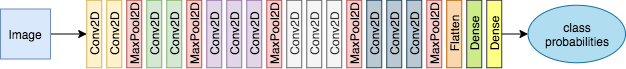


It is primarily made up of a series of Conv2D layers followed by a softmax activated layers to classify the image. As you can see, this will be a handful and the code will look huge if you specify each layer individually. As shown in the lectures, you can instead use model subclassing to build complex architectures. You can encapsulate repeating parts of a network then reuse that code when building the final model. You will get to practice that in this exercise. Let's get started!

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import keras.utils

In [ ]:
class MyClass:
    def __init__(self):
        self.var1 = 1

my_obj = MyClass()
for i in range(9):
  vars(my_obj)[f'var{i}']=0
vars(my_obj)


{'var0': 0,
 'var1': 0,
 'var2': 0,
 'var3': 0,
 'var4': 0,
 'var5': 0,
 'var6': 0,
 'var7': 0,
 'var8': 0}

In [ ]:
class Block(tf.keras.Model):
  def __init__(self, filters, kernel_size, repetitions, pool_size=2, strides=2):
    super(Block,self).__init__()
    self.filters=filters
    self.kernel_size=kernel_size
    self.repetitions=repetitions

    for i in range(2):
      vars(self)[f'conv2D_{i}']=tf.keras.layers.Conv2D(self.filters,self.kernel_size,activation='relu',padding='same')

    self.max_pool=tf.keras.layers.MaxPool2D(pool_size=pool_size,strides=strides)

  def call(self,inputs):
    conv2D_0=vars(self)['conv2D_0']
    x=self.conv2D_0(inputs)
    for i in range(1,self.repetitions):
      conv2D_i=vars(self)[f'conv2D_{i}']
      x=conv2D_i(x)
    max_pool=self.max_pool(x)
    return max_pool        


In [ ]:
class MyVGG(tf.keras.Model):

  def __init__(self, num_classes):
      super(MyVGG, self).__init__()
      self.block_a = Block(filters=64, kernel_size=3, repetitions=2)
      self.block_b = Block(filters=128, kernel_size=3, repetitions=2)
      self.block_c = Block(filters=256, kernel_size=3, repetitions=3)
      self.block_d = Block(filters=512, kernel_size=3, repetitions=3)
      self.block_e = Block(filters=512, kernel_size=3, repetitions=3)


      self.flatten=tf.keras.layers.Flatten()
      self.fc=tf.keras.layers.Dense(256,activation='relu')
      self.classifier =  tf.keras.layers.Dense(units=num_classes,activation='softmax')

  def call(self,inputs):
    x=self.block_a(inputs)
    x=self.block_b(x)
    x=self.block_c(x)
    x=self.block_d(x)
    x = self.block_e(x)
    x = self.flatten(x)
    x = self.fc(x)
    x = self.classifier(x)
    return x



In [ ]:
dataset = tfds.load('cats_vs_dogs', split=tfds.Split.TRAIN, data_dir='data/')
vgg=MyVGG(num_classes=2)
vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

def preprocess(features):
  image = tf.image.resize(features['image'], (224, 224))
  return tf.cast(image, tf.float32) / 255., features['label']

dataset = dataset.map(preprocess).batch(32)
vgg.fit(dataset, epochs=10)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

DownloadError: ignored